# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.



---



---


Inicialmente para intentar predecir el precio de una propiedad, creo que las variables que podrian ayudarnos serian:
- Tamaño en metros cuadrados.
- Cantidad de habitaciones.
- Acabado de propiedad (Embaldosado, enchapado, pintura, detalles).
- Ubicación.
- Estrato.
- altura (en que piso se ubica).

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
#Linea para conectar a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 1/Proyecto Properati/DS_Proyecto_01_Datos_Properati.csv')
data_raw.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [ ]:
data_raw.shape

(146660, 19)

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
data_raw.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

En contramos muchos valores faltantes en algunas columnas. Pero no vamos a eliminar dichas instancias, ya que podemos perder informacion importante.

In [ ]:
data_raw.duplicated().sum()

2358

Encontramos que existen 2358 instancias repetidas.

In [ ]:
data_raw[data_raw.duplicated(keep=False)]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta
7,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
38,2019-10-17,2019-10-22,2019-10-17,-34.597613,-58.416688,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,USD,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146546,2019-07-31,2020-01-17,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,89.0,82.0,434999.0,USD,Quo Palermo 3 amb a la venta a estrenar,Edifico Quo Palermo Paraguay 4445Piso alto 81m...,Departamento,Venta
146568,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,57.0,46.0,120000.0,USD,VENTA - DEPARTAMENTO 2 AMBIENTES - CONTRAFRENT...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta
146571,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,57.0,46.0,120000.0,USD,VENTA - DEPARTAMENTO 2 AMBIENTES - CONTRAFRENT...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta
146577,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,USD,VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta


Aqui podemos ver las cantidad total de filas (influyendo las originales) que hay en dataframe.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
data_raw.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

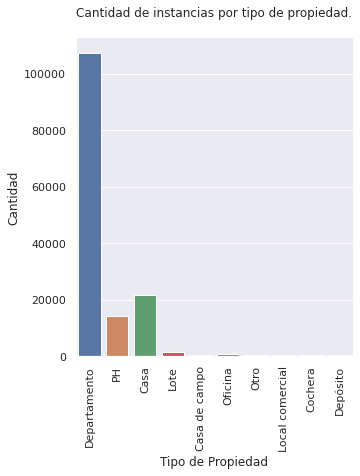

In [ ]:
sns.catplot(data=data_raw ,x= 'property_type', kind='count')
plt.xticks(rotation=90)
plt.title('Cantidad de instancias por tipo de propiedad.\n')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.show();

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

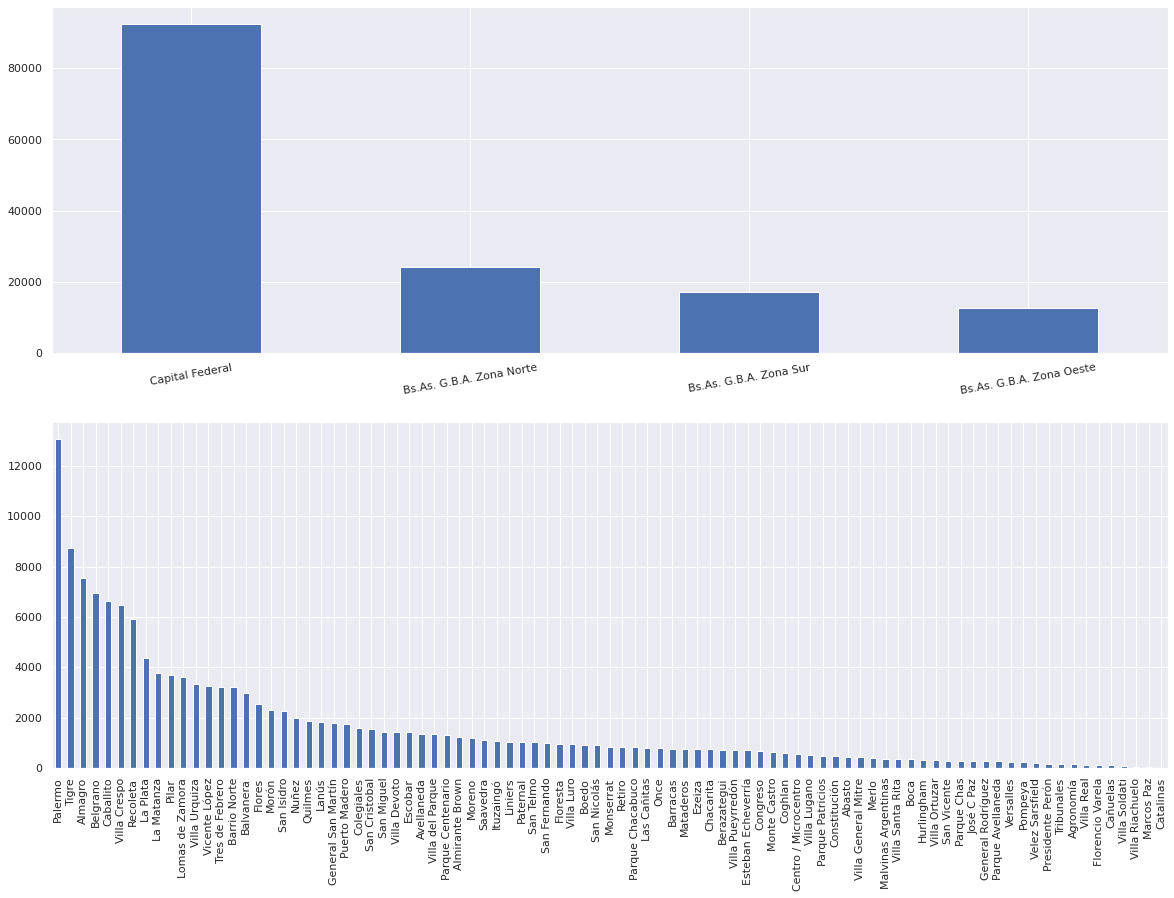

In [ ]:
plt.figure(figsize=(20,14))

plt.subplot(2, 1, 1)
data_raw.l2.value_counts().plot(kind='bar')
plt.xticks(rotation = 10)


plt.subplot(2, 1, 2)
data_raw.l3.value_counts().plot(kind='bar')

plt.show()


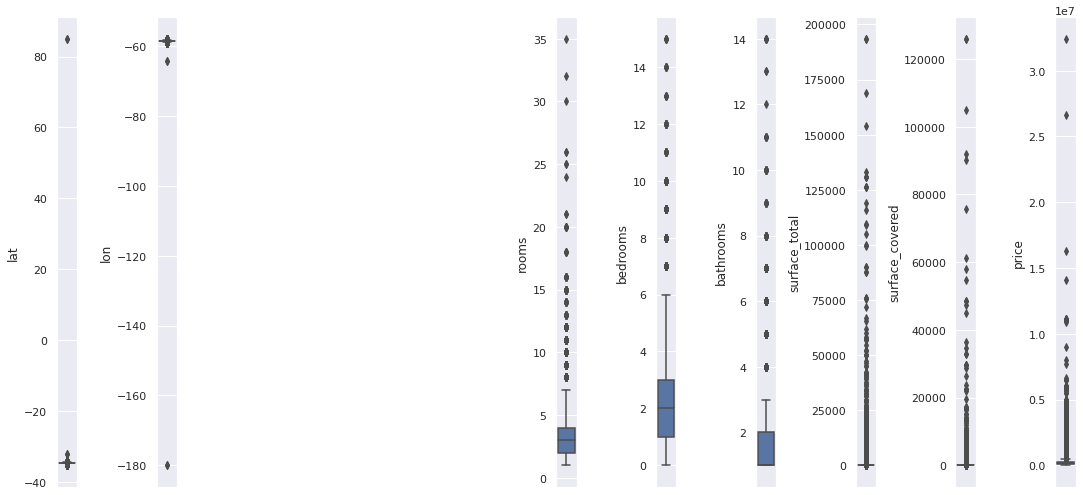

In [ ]:
fig = plt.figure(figsize=(20,7))
for i in range(len(data_raw.columns)):
  if data_raw.iloc[:,i].dtypes == np.float64:  
    fig.add_subplot(1,15, i+1)    
    sns.boxplot(y=data_raw.iloc[:,i])
plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(data=data_raw.l3.value_counts())

,l3
Palermo,13073
Tigre,8718
Almagro,7527
Belgrano,6935
Caballito,6650
...,...
Cañuelas,108
Villa Soldati,69
Villa Riachuelo,42
Marcos Paz,35


In [ ]:
da=  data_raw.l3.unique()
len(da)

89

Aqui podemos darnos cuenta que existen 89 valores diferentes para la columna 'l3'. Y que los barrios que mas aportan datos son: Palermo, Tigre, almagro, belgrano, Cabllito, villa crespo, recoleta y la plata.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
#mascaras para filtar las instancias que pertenecen a los diferentes tipos de propiedades
depar = data_raw.property_type.isin(['Departamento'])
ph = data_raw.property_type.isin(['PH'])
casa = data_raw.property_type.isin(['Casa'])


In [ ]:
data_raw.shape

(146660, 19)

In [ ]:
# se aplican las mascaras al dataset inicial y se guarda todo en el nuevo dataset
data = data_raw[depar | ph | casa]
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [ ]:
data.shape

(143145, 19)

Adicionalmente aliminare unas columnas que ahora mismo no me van a servir de mucho en el EDA. tales columnas son: start_date, end_date, created_on y l1.
Debido a que son fechas  y la coumna l1 tiene un unico valor que es 'Argentina' por tanto si mas adelante se necesita sera muy facil agregarla nuevamente.

In [ ]:
print(data.shape)
#elimine algunas columas con la funcion drop.
data.drop(columns=['start_date', 'end_date', 'created_on','l1'], inplace=True)


(143145, 19)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(data.shape)

(143145, 15)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Creare un dataframe donde ire guardando los datos filtrados para asi usar el pairplot.

'df_filtrado'

Para ROOMS

Realizare la funcion value_conts de pandas sobre la columna rooms, para mirar cuales son las cantidades que hay ára cada numero de habitaciones o cuartos.

In [ ]:
data.rooms.value_counts()

3.0     44573
2.0     41044
4.0     28922
1.0     11129
5.0     10356
6.0      4008
7.0      1729
8.0       793
9.0       226
10.0      202
12.0       50
11.0       46
15.0       15
14.0       12
13.0       12
20.0        7
16.0        7
18.0        4
21.0        2
26.0        2
25.0        2
24.0        1
30.0        1
35.0        1
32.0        1
Name: rooms, dtype: int64

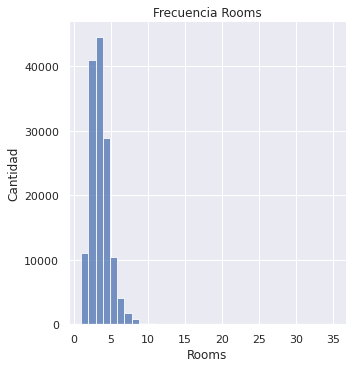

In [ ]:
sns.displot(data=data, x='rooms', bins = 35)
plt.title('Frecuencia Rooms')
plt.xlabel('Rooms')
plt.ylabel('Cantidad')
plt.show();

En la grafica anterior podemos ver como hay una mayor frecuencia de rooms para valores mas pequeños. 

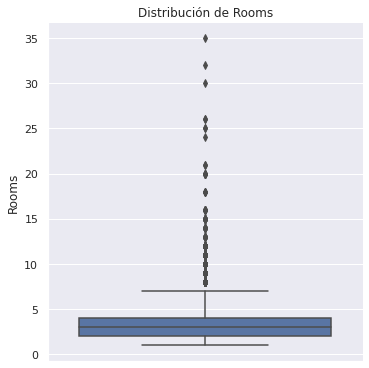

In [ ]:
sns.catplot(data=data, y='rooms', kind='box')
plt.title('Distribución de Rooms')
plt.ylabel('Rooms')
plt.show();

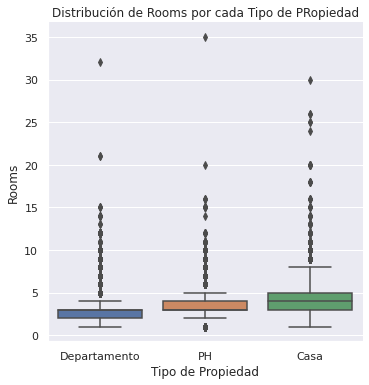

In [ ]:
sns.catplot(data=data, y='rooms', x='property_type', kind='box')
plt.title('Distribución de Rooms por cada Tipo de PRopiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Rooms')
plt.show()

Vemos como para el tipo de propiedad Casa tiene sus datos mas dispersos. vemos tambien como los outliers cambian de valor para cada tipo de propiedad por ejemplo: para Departamento los outliers empiezan aproximadamente en 5, es decir valores mayores o iguales de 5 serian outliers. Pero para PH enocntramos que los outliers estan por debajo de 3 aproximadamente y por encima de 5. Y para Casa vemos como los outliers empiezan aproximadamente en 7, es decir mayores de 7 seran outliers.

---
# **Bedrooms**



In [ ]:
data.bedrooms.value_counts()

1.0     49083
2.0     45612
3.0     31019
4.0      8881
0.0      5467
5.0      1983
6.0       705
7.0       248
8.0        55
9.0        27
10.0       19
12.0       15
11.0       13
13.0        6
15.0        6
14.0        6
Name: bedrooms, dtype: int64

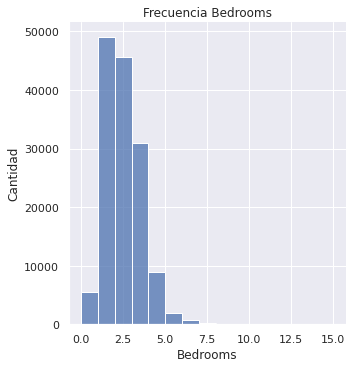

In [ ]:
sns.displot(data=data, x='bedrooms', bins = 15)
plt.title('Frecuencia Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Cantidad')
plt.show();

En esta grafica vemos como para la gran mayoria de los datos se encuentra entre los valores de 1 y 7 aproximadamente. Miraremos esto con mayor claridad en la grafica de cajas.

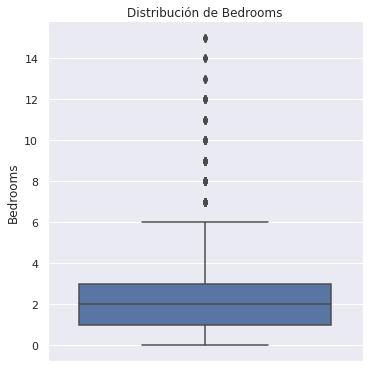

In [ ]:
sns.catplot(data=data, y='bedrooms', kind='box')
plt.title('Distribución de Bedrooms')
plt.ylabel('Bedrooms')
plt.show();

Podemos ver con mayor claridad que segun la grafica los valores mayores de 6 seran tomados como outliers.

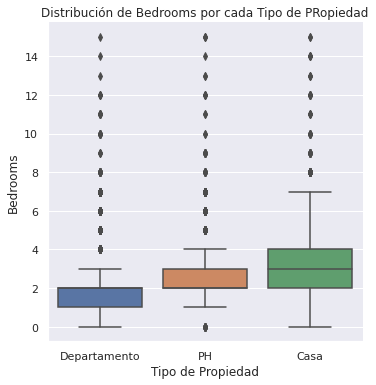

In [ ]:
sns.catplot(data=data, y='bedrooms', x='property_type', kind='box')
plt.title('Distribución de Bedrooms por cada Tipo de PRopiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Bedrooms')
plt.show()

Vemos como el comportamiento general de la gracfia en muy parecido a la de rooms, donde casa tiene unos datos mas dispersos y sus outliers son tomados encuenta desde un valor mayor (7 aproximadamente).
Para Departamento tiene sus datos agrupados en un rago mas pequeño de datso con respecto a los otros tipos de propiedad  y sus outliers empiezan desde 3. Para PH vemos como tiene outliers por debajo y por encima donde menores de 1 son considerados outliers y por encima de 4 tambien.

---
# **Bathrooms**



In [ ]:
data.bathrooms.value_counts()

1.0     82056
2.0     38562
3.0     12830
4.0      3878
5.0      1151
6.0       309
7.0        97
8.0        16
9.0        10
10.0        9
11.0        7
14.0        6
13.0        2
12.0        1
Name: bathrooms, dtype: int64

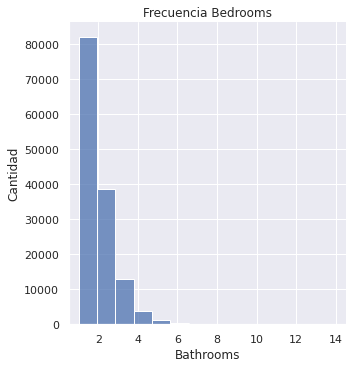

In [ ]:
sns.displot(data=data, x='bathrooms', bins = 14)
plt.title('Frecuencia Bedrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Cantidad')
plt.xlim(0.5,14.5)
plt.show();

Podemos ver que son más frecuentes valores mas pequeños de  la variable y en 1 hay mas de 80 mil instancias.

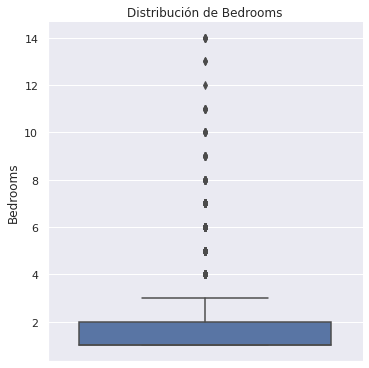

In [ ]:
sns.catplot(data=data, y='bathrooms', kind='box')
plt.title('Distribución de Bedrooms')
plt.ylabel('Bedrooms')
plt.show();

En esta grafica podemos ver como apartir de valores de 3 son considerados outliers.

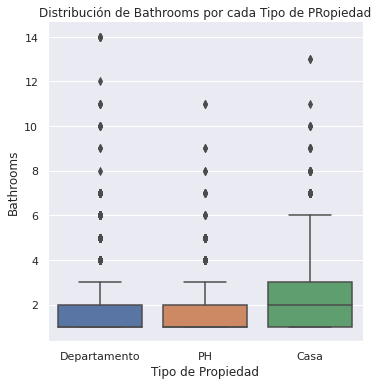

In [ ]:
sns.catplot(data=data, y='bathrooms', x='property_type', kind='box')
plt.title('Distribución de Bathrooms por cada Tipo de PRopiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Bathrooms')
plt.show()

Vemos como para los tipos de propiedad Departamento y PH la distribuion se comporta muy parecido, donde por encima de 3 son considerados outliers, en cambio para casa sudistribucion sube hasta 6 y apatir de este valor son considerados outliers.

---
# **surface_total**

In [ ]:
data.surface_total.value_counts()

50.0      2581
60.0      2163
42.0      2136
70.0      2101
45.0      2073
          ... 
1216.0       1
1110.0       1
1881.0       1
8352.0       1
4152.0       1
Name: surface_total, Length: 1674, dtype: int64

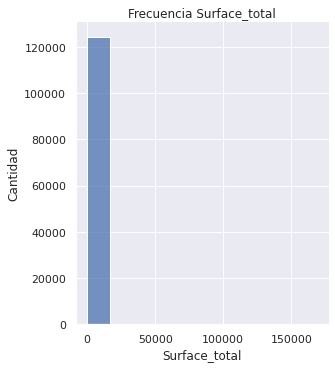

In [ ]:
sns.displot(data=data, x='surface_total', bins =10)
plt.title('Frecuencia Surface_total')
plt.xlabel('Surface_total')
plt.ylabel('Cantidad')
plt.show();

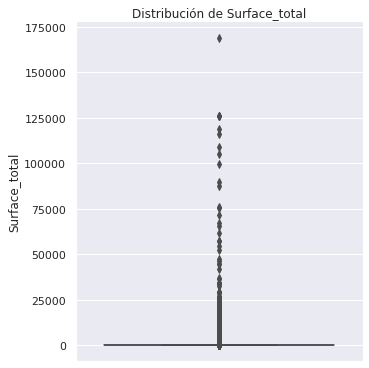

In [ ]:
sns.catplot(data=data, y='surface_total', kind='box')
plt.title('Distribución de Surface_total')
plt.ylabel('Surface_total')
plt.show();

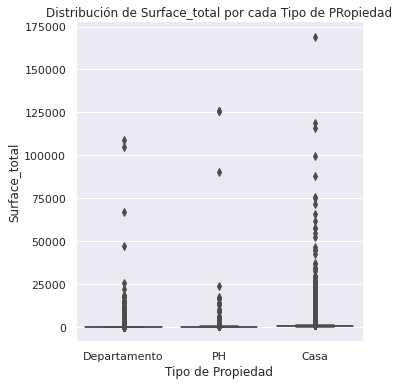

In [ ]:
sns.catplot(data=data, y='surface_total', x='property_type', kind='box')
plt.title('Distribución de Surface_total por cada Tipo de PRopiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Surface_total')
plt.show()

Apartir del grafico anterior vemos como los los valores tan grandes achatan las cajas, para ellos filtraremos el dataframe con valores menores o iguales a 10 mil y miraremos como se comporta.

In [ ]:
print('shape original: ',data.shape)
print('shape filtrado: ',data[data['surface_total']<=10000].shape)

shape original:  (143145, 15)
shape filtrado:  (124380, 15)


In [ ]:
df_filtrado = data[data['surface_total']<=10000]
df_filtrado.shape

(124380, 15)

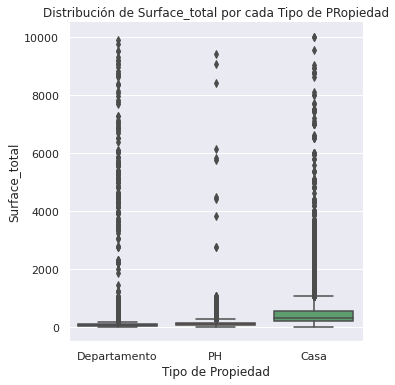

In [ ]:
sns.catplot(data=data[data['surface_total']<=10000], y='surface_total', x='property_type', kind='box')
plt.title('Distribución de Surface_total por cada Tipo de PRopiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Surface_total')
plt.show()

Podemos ver como aun esta muy achadas las cajas por tanto usaremos un valor mas pequeño como por ejemplo 2 mil y miraremos el numero de instancias que quedaron por fuera.

In [ ]:
print('shape original: ',data.shape)
print('shape filtrado: ',data[data['surface_total']<=2000].shape)

shape original:  (143145, 15)
shape filtrado:  (123864, 15)


In [ ]:
df_filtrado = df_filtrado[df_filtrado['surface_total']<=2000]
df_filtrado.shape

(123864, 15)

al haber aplicado el filtro con un valor maximo de 2 mil, se excluyeron aproximadamente 20 mil instancias del dataframe pero el numerode instancias total aun es grande. Por ellos procederemos a filtar con 2 mil para la columna superficie total.

In [ ]:
#data = data[data['surface_total']<=2000]

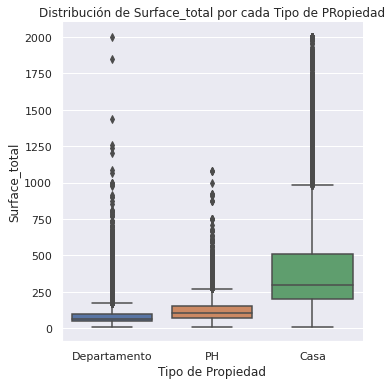

In [ ]:
sns.catplot(data=data[data['surface_total']<=2000], y='surface_total', x='property_type', kind='box')
plt.title('Distribución de Surface_total por cada Tipo de PRopiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Surface_total')
plt.show()

Luego de graficar el dataframe filtrado vemos con mas detalle como podemos identificar los outliers para cada tipo de propiedad. Para Casa serian considerados outliers desde aproximadamente mil, para PH son desde 250 aproximandamente y para Departamento desde 200 aproximadamente.

---
# **Surface_covered**


Como hicimos para la columna anterior iremos filtrando de a poco para encontrar un valor "optimo" que nos pérmita entender la grafica mejor.

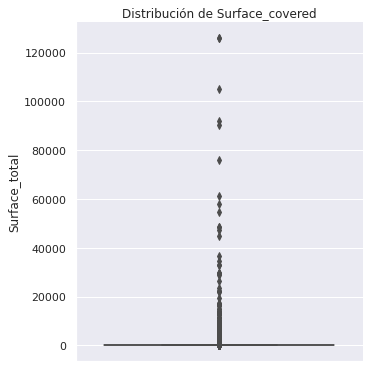

In [ ]:
sns.catplot(data=data, y='surface_covered', kind='box')
plt.title('Distribución de Surface_covered')
plt.ylabel('Surface_total')
plt.show();

Iniciaremos filtrando por 10 mil.

In [ ]:
print('shape original: ',data.shape)
print('shape filtrado: ',data[data['surface_covered']<=10000].shape)

shape original:  (143145, 15)
shape filtrado:  (124185, 15)


In [ ]:
df_filtrado = df_filtrado[df_filtrado['surface_covered']<=10000]
df_filtrado.shape

(123047, 15)

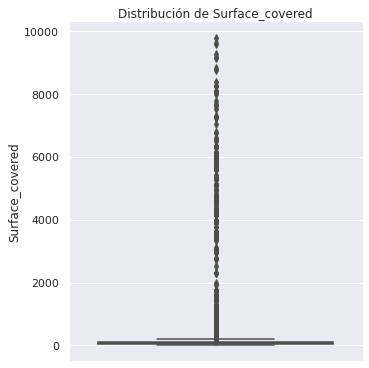

In [ ]:
sns.catplot(data=data[data['surface_covered']<=10000], y='surface_covered', kind='box')
plt.title('Distribución de Surface_covered')
plt.ylabel('Surface_covered')
plt.show();

Ahora usaremos 2 mil como valor maximo.

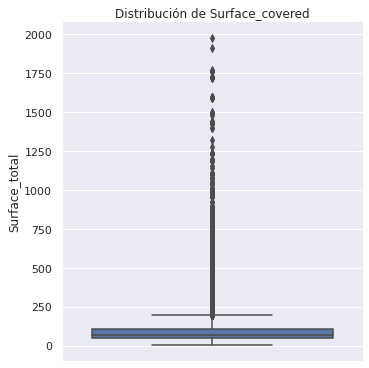

In [ ]:
sns.catplot(data=data[data['surface_covered']<=2000], y='surface_covered', kind='box')
plt.title('Distribución de Surface_covered')
plt.ylabel('Surface_total')
plt.show();

In [ ]:
print('shape original: ',data.shape)
print('shape filtrado: ',data[data['surface_covered']<=2000].shape)

shape original:  (143145, 15)
shape filtrado:  (124031, 15)


In [ ]:
df_filtrado = df_filtrado[df_filtrado['surface_covered']<=2000]

In [ ]:
df_filtrado.shape

(123000, 15)

como ya podemos ver mejor como se comporta la grafica con estos valores filtraremos las filas del dataframe que no cumplan con la condicion.

Seran quitadas exactamente 864 fial al aplicar el filtro.

In [ ]:
#data = data[data['surface_covered']<=2000]

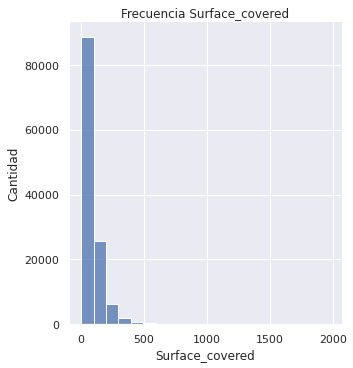

In [ ]:
sns.displot(data=data[data['surface_covered']<=2000], x ='surface_covered', bins= 20)
plt.title('Frecuencia Surface_covered')
plt.xlabel('Surface_covered')
plt.ylabel('Cantidad')
plt.show();

Los valores para la variable estan muy compactos, estan entre valores de 0 y 500 la mayoria de los datos.


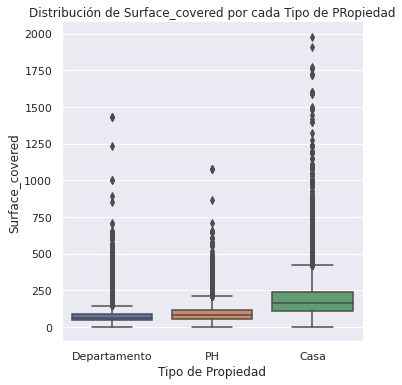

In [ ]:
sns.catplot(data=data[data['surface_covered']<=2000], y='surface_covered', x='property_type', kind='box')
plt.title('Distribución de Surface_covered por cada Tipo de PRopiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Surface_covered')
plt.show()

En esta grafica podemos observar con mayor claridad desde que valores empiezan a ser considerados outliers para cada tipo de propiedad, podemos ver que para casa es desde 400 aproximadamente, PH desde 250 aproximadamente y Apartamento desde 100 aproximadamente.

Creare un flitro con la condicion que si la variable surface_covered es mayor que la variable surface_total, estas instancias seran quitadas del dataset.

In [ ]:
data.shape

(143145, 15)

In [ ]:
data[data['surface_covered']<=data['surface_total']].shape

(122306, 15)

In [ ]:
df_filtrado = df_filtrado[df_filtrado['surface_covered']<=df_filtrado['surface_total']]

In [ ]:
df_filtrado.shape

(121652, 15)

Encontramos que existen aproximadamente 20 mil registron con ese tipo de inconsistencia.

---
# **Price**




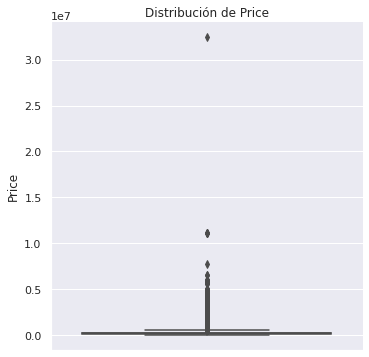

In [ ]:
sns.catplot(data=data, y='price', kind='box')
plt.title('Distribución de Price')
plt.ylabel('Price')
plt.show();

Vemos como esta grafica esta bastante acahatada debido a los valores extremos que tienen algunos outliers, para mirar mejor dicho comportamiento filtraremos con vlaor de 500 mil.

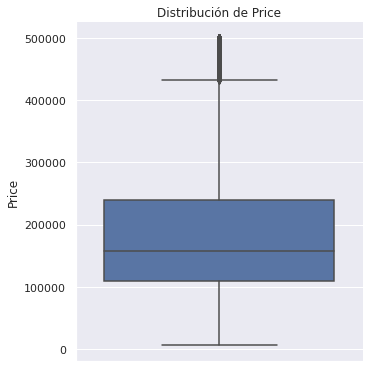

In [ ]:
sns.catplot(data=data[data['price']<=500000], y='price', kind='box')
plt.title('Distribución de Price')
plt.ylabel('Price')
plt.show();

Vemos que la distribucion de los datos va desde valores muy cercanos a cero hasta 420 mil aproximadamente y teniendo una media de 160 mil aprox.

In [ ]:
print('shape original: ',data.shape)
print('shape filtrado: ',data[data['price']<=500000].shape)

shape original:  (143145, 15)
shape filtrado:  (133104, 15)


In [ ]:
df_filtrado=df_filtrado[df_filtrado['price']<=500000]

In [ ]:
df_filtrado.shape

(112780, 15)

al aplicar el filtro vemos como se reduce el dataframe en aproximandamente 10 mil instancias.

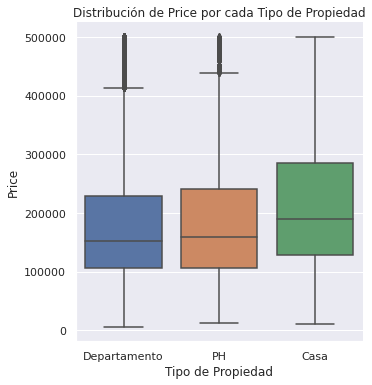

In [ ]:
sns.catplot(data=data[data['price']<=500000], y='price', x='property_type', kind='box')
plt.title('Distribución de Price por cada Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Price')
plt.show()

Interesante ver que para tipo d eporpiedad 'Casa' no hay outliers al aplicar el filtro. Y para los otros dos tipos de propiedad si existen outliers.

El promedio de Casa es mayor que el promedio de PH y este es mayor al promedio de Departamento.

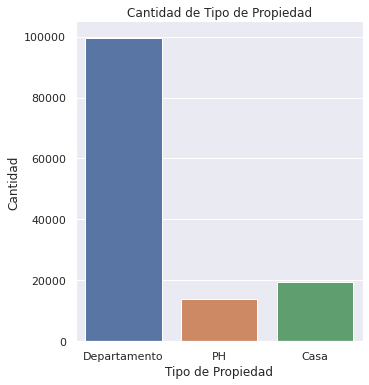

In [ ]:
sns.catplot(data=data[data['price']<=500000], x='property_type', kind='count')
plt.title('Cantidad de Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.show()

Luego de filtrar el dataframe por price<=500000. Vemos como departamentento tiene casi 4 veces mas instancias que Casa. Y PH tiene el menor numero de instancias.

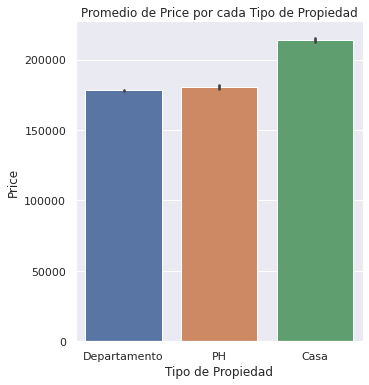

In [ ]:
sns.catplot(data=data[data['price']<=500000], x='property_type', y='price', kind='bar')
plt.title('Promedio de Price por cada Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Price')
plt.show()

Apesar de que Departamento posee casi 4 veces mas datos que Casa, su promedio esta por debajo. Y el promedio de PH y Departamento esta casi igual.

---
# **PAIRPLOT**


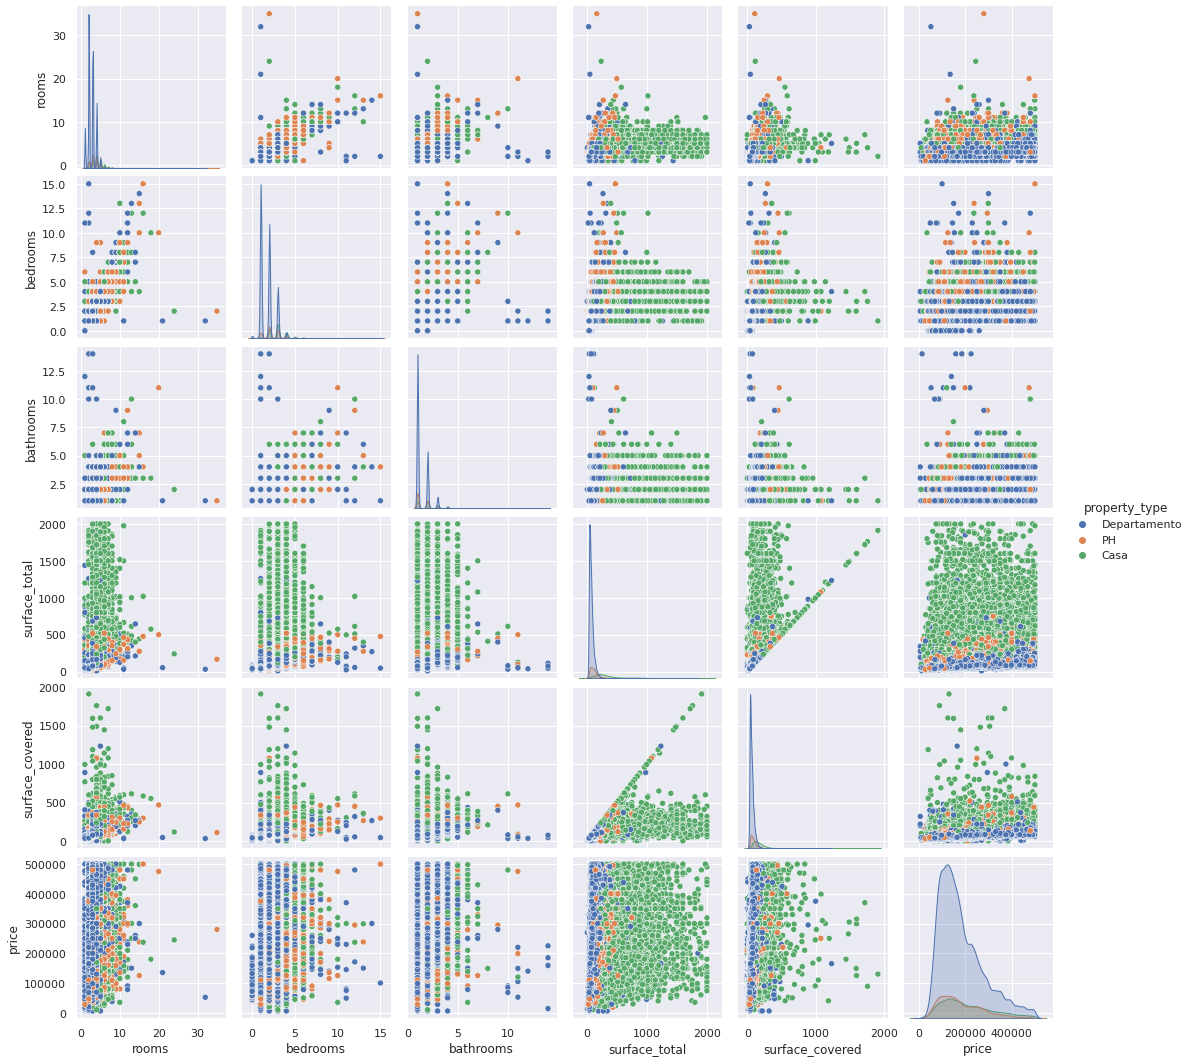

In [ ]:
sns.pairplot(data=df_filtrado.drop(columns=['lat','lon']) ,hue='property_type')

Del anterior Pairplot podemos concluir:
- Para valores altos de surface_total y surface_covered la gran mayoria de los datos pertenecen a tipo de propiedad Casa.
- Apra valores bajos de bathrooms y bedrooms un porcentaje muy alto pertenecen a tipo de datos Departamento.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
data.columns

Index(['lat', 'lon', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'title',
       'description', 'property_type', 'operation_type'],
      dtype='object')

In [ ]:
df2= data
df2.dropna(inplace=True,axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
cor = df2.drop(columns=['lat','lon','l2','l3','description','property_type','operation_type','currency','title']).corr()

In [ ]:
cor

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.911744,0.616442,0.098656,0.074589,0.395551
bedrooms,0.911744,1.000000,0.624491,0.093286,0.071716,0.375335
bathrooms,0.616442,0.624491,1.000000,0.078080,0.069324,0.549818
surface_total,0.098656,0.093286,0.078080,1.000000,0.421452,0.042787
surface_covered,0.074589,0.071716,0.069324,0.421452,1.000000,0.048279
price,0.395551,0.375335,0.549818,0.042787,0.048279,1.000000


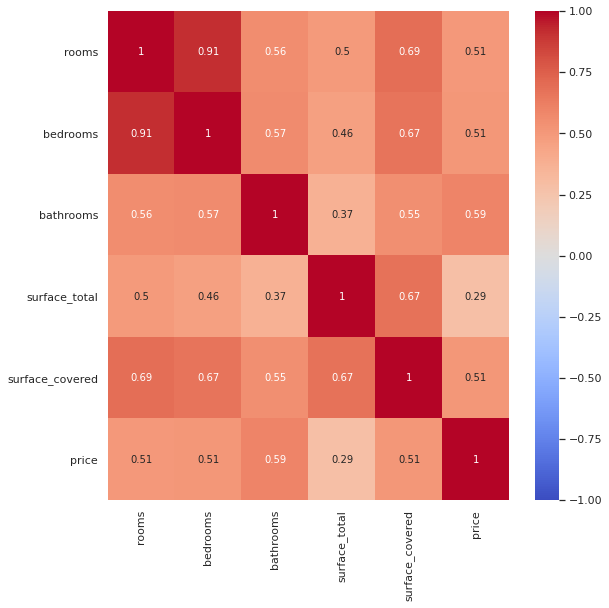

In [ ]:
#sns.heatmap(cor ,annot=True)
plt.figure(figsize=(9,9))
sns.heatmap(data=df_filtrado.drop(columns=['lat','lon']).corr(),annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show();

En el anterior grafico encontramos las correlaciones para el dataframe filtrado.

1. Encontramos una correlacion positiva muy fuerte entre rooms y bedrooms.
2. Encontramos una correlacion interesante entre rooms y bedrooms con surface_covered
3. la variable objetivo (price) posee unas correlaciones, aun que no muy fuertes, si interesantes, con todas las variables numericas del dataframe excepto

Al encotrar esas correlaciones de la variable objetivo con las demas, podemos decir que esats van ayudar o influiran en la predicciones de  nuestro modelo.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Al analizar parte de la informacion contenida en la dataframe, creo que seria interesante tratar de encontrar las razones de porque hay una diferencia tan grande de propiedades publicadas entre barrrios. Como veremos en la siguiente grafica:

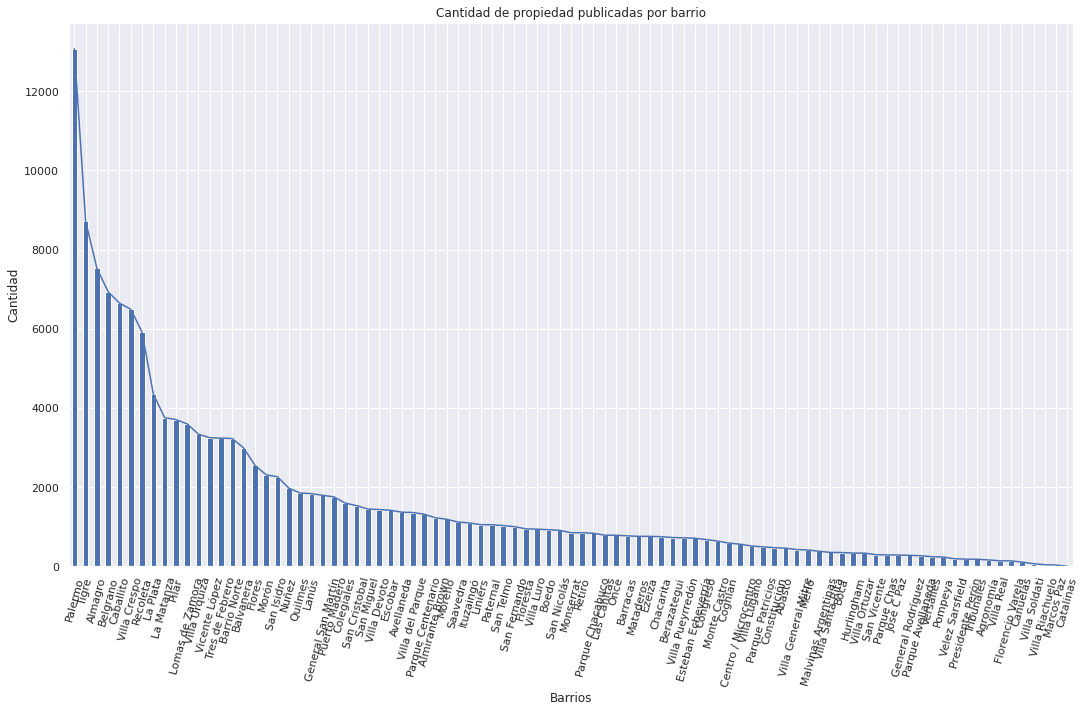

In [ ]:
plt.figure(figsize=(18,10))

data_raw.l3.value_counts().plot(kind='bar')
plt.title('Cantidad de propiedad publicadas por barrio')
plt.xlabel('Barrios')
plt.ylabel('Cantidad')
data_raw.l3.value_counts().plot(kind='line')
plt.xticks(rotation=75)
plt.show()

Graficaremos los barrios con mayor numuero ede publicaciones:

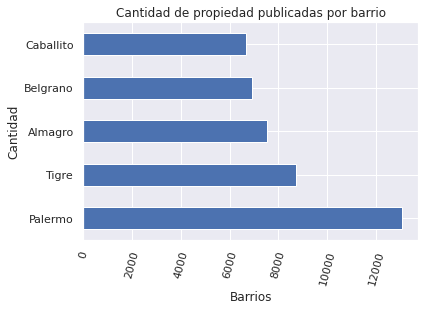

In [ ]:
data_raw.l3.value_counts().iloc[0:5].plot(kind='barh')
plt.title('Cantidad de propiedad publicadas por barrio')
plt.xlabel('Barrios')
plt.ylabel('Cantidad')
plt.xticks(rotation=75)
plt.show()

Graficaremos los 5 barrios con menor numero de publicaciones:

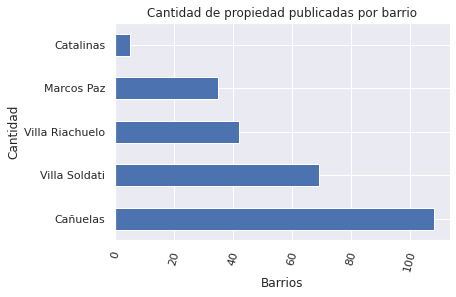

In [ ]:
data_raw.l3.value_counts().iloc[-5:].plot(kind='barh')
plt.title('Cantidad de propiedad publicadas por barrio')
plt.xlabel('Barrios')
plt.ylabel('Cantidad')
plt.xticks(rotation=75)
plt.show()

Podemos ver la diferencia tan grande que hay entre los barrios.

Debido a lo anterior quisiera poder entender ¿a que se debe estas diferencias tan grandes? 

Tratando de dar respuesta a esta duda, se llego a unas posibles causas:

- Seguridad del barrio (delincuencia).
- Nivel socioeconomico.
- Valor de los servicios publicos.
- Dificil acceso a servicios publicos.
- cercania a escuelas, hospitales, estaciones de policia y locales comerciales.
- posicion geografica del barrio.
- Precios altos de las propiedades.
- Tipos de propiedades.

De las razones anteriormente relacionadas, algunas de ellas podrian ser resuletas con los datos que posee el dataframe properati. por ejemplo:
- posicion geografica del barrio. Ya que poseemos la longitud y latitud de la porpiedad y por tanto podriamos ubicarlas en el mapa de la ciudad.
- Precios altos de las propiedades. Ya que poseemos los datos de los precios y podriamos sacar un promedio de los precios para dichos barrios.
- Tipos de propiedades. ya que podemos relacionar cuales son los tipos de propiedad que mas se publican para dichos barrios.
- Promedio de precio por m2.


Miraremos como se comportan los barrios con mayor numero de publicaciones con respecto a su promedio de 'Price'.

Primero lo haremos para los 5 barrios con menor numeor de publicaciones luego para los barrios con mayor numero de publicaciones.

In [ ]:
#menor numero de publicaciones.
barrios_men= data_raw.groupby(['l3'])[['price']].agg(['count','mean']).sort_values(by=('price','count'), ascending=False).iloc[-5:]
barrios_men

price               
                count           mean
l3                                  
Cañuelas          108  326566.666667
Villa Soldati      69  122472.463768
Villa Riachuelo    42  535988.071429
Marcos Paz         35  173200.000000
Catalinas           5  166200.000000

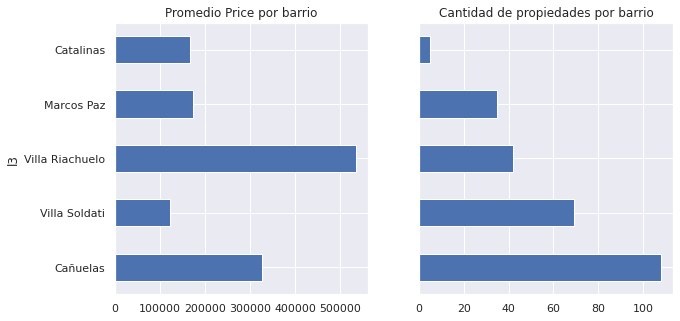

In [ ]:
fig, axs = plt.subplots(1,2,figsize= (10,5), sharey= True,)
barrios_men.price['mean'].plot(kind='barh', ax=axs[0], title='Promedio Price por barrio')
barrios_men.price['count'].plot(kind='barh', ax=axs[1],title='Cantidad de propiedades por barrio');

In [ ]:
#Mayor numero de publicaciones
barrios_mas = data_raw.groupby(['l3'])[['price']].agg(['count','mean']).sort_values(by=('price','count'), ascending=False).iloc[0:5]
barrios_mas

price               
           count           mean
l3                             
Palermo    13073  354750.968561
Tigre       8718  260613.268066
Almagro     7527  180403.760861
Belgrano    6935  376293.661283
Caballito   6650  218500.362256

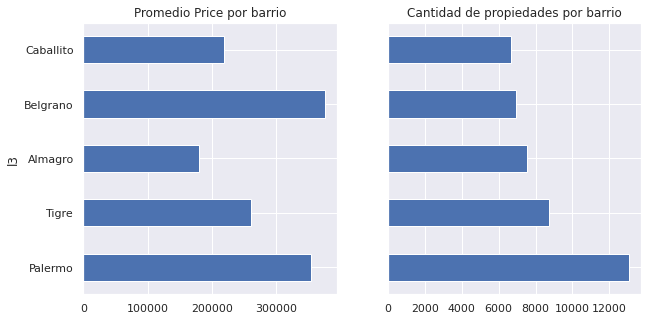

In [ ]:
fig, axs = plt.subplots(1,2,figsize= (10,5), sharey= True)
barrios_mas.price['mean'].plot(kind='barh', ax=axs[0],title='Promedio Price por barrio')
barrios_mas.price['count'].plot(kind='barh', ax=axs[1],title='Cantidad de propiedades por barrio');

En la primera parte donde graficamos los barrios con menos numeros de publicaciones, vemos como el barrio Villa Riachuelo	con 42 publicaiones, posee un promedio de 535988.071429 dolares lo cual es un valor que supera incluso a los barrios que mas poseen publicaciones. Una primera premisa seria que es un barrio con un estrato socieconomico alto y podria llegar hacer fincas o manciones.

Tambien podemos ver en la segunda parte como Belgrano a pesar de tener casi la mitad de los datos en comparacion con Palermo posee un promedio mas alto.



de lo anterior podriamos concluir que el precio de la propiedad no influye en el numero de publicaciones.

Promedio de Precio por m2.

In [ ]:
m2 = data_raw.groupby(('l3'))[['surface_total','surface_covered','price']].sum()
m2

,surface_total,surface_covered,price
l3,,,
Abasto,31465.0,27801.0,7.931118e+07
Agronomía,16459.0,14083.0,3.221813e+07
Almagro,619415.0,545419.0,1.357899e+09
Almirante Brown,196611.0,60034.0,2.992096e+08
Avellaneda,250603.0,214431.0,1.743632e+08
...,...,...,...
Villa Riachuelo,5297.0,3609.0,2.251150e+07
Villa Santa Rita,31846.0,23608.0,5.755356e+07
Villa Soldati,11516.0,19269.0,8.450600e+06


Esto podemos usar mas adelante para calcular el promedio de m2 tanto construido como no construido y sacar un promedio por barrio. (esta parte la dejare para realizar en el sprint 2)

De todo lo que dijimos que podria influir en la cantidad de propiedades publicadas por barrios, no pódemos sacar concluciones debido a que no contamos  con toda la informacion necesaria.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.



---



---



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 1/Proyecto Properati/DS_Proyecto_01_Datos_Properati.csv')

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.

In [ ]:
df.shape

(118740, 6)

In [ ]:
#mascaras para filtar las instancias que pertenecen a los diferentes tipos de propiedades
depar = df.property_type.isin(['Departamento'])
ph = df.property_type.isin(['PH'])
casa = df.property_type.isin(['Casa'])

In [ ]:
# se aplican las mascaras al dataset inicial y se guarda todo en el nuevo dataset
df = data_raw[depar | ph | casa]
df.shape

(143145, 19)

2. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.

In [ ]:
df = df[(df['surface_total']<1000) & (df['surface_total']>15)]
df.shape

(122601, 19)

3. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.

In [ ]:
df = df[df['price']<4000000]
df.shape

(122552, 19)

4. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.

In [ ]:
df = df[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price']]
df.shape

(122552, 6)

In [ ]:
df.dropna(inplace=True, axis=0)
df.shape

(120114, 6)

In [ ]:
df = df[(df['surface_total'] >= df['surface_covered'])]
df.shape

(118740, 6)

Luego de filtrar todo el dataframe, crearemos X para las variables predictoras e y para la variable a predecir.

In [ ]:
X = df.drop(columns='price',axis=1)
y = df[['price']]

Importamos las librerias:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score,mean_absolute_error, classification_report
from sklearn.model_selection import  train_test_split

Debido a que los modelos que usaremos son de regresion, ya que la variable a predecir es numerica continua, usaremos mean_squared_error como metrica para medir que tan bien predice nuestro modelo. 

Como sabemos el error emdio cuadratico es la diferencia de los valores reales con los valores predichos. La idea es tratar de llevar esta metrica los mas cercano a 0 posible.


Leugo de escoger la metrica para evaluar nuestro modelo, usaremos el metodo train_test_split para partir nuestro datos en datos de entrenamiento y datos de testeo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

Ahora generaremos nuestro modelo de Benchmark.

#BENCHMARK

Como modelo de benchmark usaremos un modelo de regresion lineal.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualizaremos los coeficientes y el intercepto que encontro nuestro modelo. 

In [ ]:
print('Coeficientes: ', lr.coef_)
print('Intercepto: ',lr.intercept_)

Coeficientes:  [[ -1466.81572356 -39904.53137968 113793.15888327   -443.53186781
    2646.47966123]]
Intercepto:  [-32688.62664535]


Predecimos para los datos de entrenamiento.


In [ ]:
y_train_pred = lr.predict(X_train)

Creamos una funcion que nos permita graficar las y verdaderas contra las y predichas y una linea para graficar lo predicho por el modelo.

In [ ]:
def grafica( y_true, y_pred):
  ax = plt.subplot()
  print('Mean_squared_eror: ', mean_squared_error(y_true,y_pred))
  print('Mean_absolute_eror: ', mean_absolute_error( y_true,y_pred))
  print('R_2 score: ', r2_score(y_true,y_pred))
  ax.scatter(y_pred, y_true, s =2)    
  lims = [
  np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
  np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
  ]

  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
  plt.xlabel('y_pred')
  plt.ylabel('y_true')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

Mean_squared_eror:  34535424042.9174
Mean_absolute_eror:  91935.74379924784
R_2 score:  0.5008701969664888


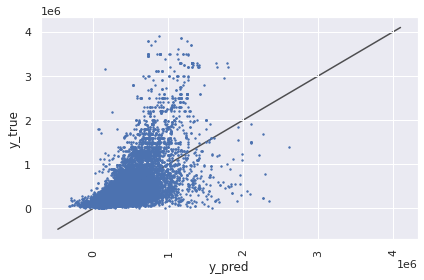

In [ ]:
grafica(y_train, y_train_pred)

Todo lo anterior se hizo para los datos de entrenamiento, ahora lo haremos para los datos de testeo.

In [ ]:
y_test_pred = lr.predict(X_test)

Llamamos la funcion para graficar la linea de prediccion.

Mean_squared_eror:  34707369781.11086
Mean_absolute_eror:  92245.52783124035
R_2 score:  0.4805877099612743


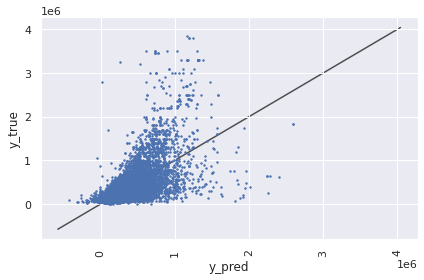

In [ ]:
grafica(y_test, y_test_pred)

# **Resultados Benchmark**
Al obtener las metricas para los datos de entrenamiento. tomaremos estos como valores del Benchmark para mejorar en los siguientes modelos. De igual manera relacionaremos acontinuacion las metricas de entrenamiento.

**Train**
- Mean_squared_eror:  34535424042.9174
- Mean_absolute_eror:  91935.74379924784
- R_2 score:  0.5008701969664888

**Test**
- Mean_squared_eror:  34707369781.11086
- Mean_absolute_eror:  92245.52783124035
- R_2 score:  0.4805877099612743

Usaremos las metricas de R_2 score para comparar nuestro modelo benckmark con los demas que vamos a crear.

Nota: Usamos R_2 score debido a que es una metrica que esta altamente relacioanda con MSE pero que su valor va siempre estará entre -∞ y 1. Y entre mas cerca este de 1 mejor sera nuestro modelo.

Y no usamos las  otras metricas como Mean_squared_eror o Mean_absolute_eror porque sus magnitudes pueden llegar a ser muy grandes y se dificultaria un poco a la hora de graficar y comparar resultados entre los diferentes modelos.

# Arbol de Decision.

Primero vamos a buscar la profundidad correcta.

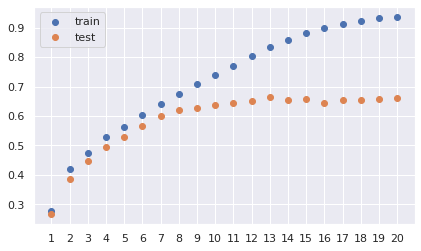

In [ ]:
max_depths = range(1, 21)
r2_train=[]
r2_test=[]

for depth in max_depths:
    tree_regresor = DecisionTreeRegressor(max_depth=depth,random_state=42)
    tree_regresor.fit(X_train, y_train) 
    
    y_train_pred = tree_regresor.predict(X_train)
    r2_train.append(r2_score(y_train, y_train_pred)) 
    
    y_test_pred = tree_regresor.predict(X_test)    
    r2_test.append(r2_score(y_test, y_test_pred))
    

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(121)

ax.scatter(max_depths,r2_train,marker="o",label="train")
ax.scatter(max_depths,r2_test,marker="o",label="test")

ax.set_xticks(max_depths)


ax.legend()
plt.show()


De la grafica anterior podemos como el modelo tiende al sobreajuste en el entramiento a medida que vamos aumentando la profundidad del arbol. Y para los datos de testeo vemos como inicialmente va aumentando y luego de estabiliza un poco y cuando tenemos una mayor profundidad empieza a decaer la metrica.

Luego de graficar la curva de validacion tanto para el conjunto de train y el conjunto de test, encontraremos la posicion en la que se encuentra el valor el maximo para el conjunto de test.

In [ ]:
#convertimos la lista en un array de numpy
r2_test= np.array(r2_test)

Visualizamos cada profundidad con su respectivo valor de r2 score.

In [ ]:
pd.DataFrame({'Profundidad':max_depths, 'r2_score':r2_test})

,Profundidad,r2_score
0,1,0.265373
1,2,0.384360
2,3,0.445600
3,4,0.494735
4,5,0.529983
5,6,0.567495
6,7,0.598277
7,8,0.618901
8,9,0.627627
9,10,0.635754


con la funcion argmax() obtenemos el indice donde esta el maximo valor para el array que corresponde a los datos de testeo, que si analizamos corresponde a la profundidad del arbol

In [ ]:
r2_test.argmax()

12

In [ ]:
r2_test.max()

0.6645419616683614

Recordando que el un array inicia en la posicion 0, quiere decir que al obtener la posicion 14 corresponde a la profundidad del arbol 15. Y con ella crearemos el arbol de regrersion acontinuacion.

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=13,random_state=42)
tree_reg.fit(X_train, y_train) 

y_train_pred = tree_reg.predict(X_train)
print('R_2 Train: ',r2_score(y_train, y_train_pred)) 

y_test_pred = tree_reg.predict(X_test)    
print('R_2 Test: ',r2_score(y_test, y_test_pred))

R_2 Train:  0.8328825713162147
R_2 Test:  0.6645419616683614


In [ ]:
r2_test.max()

0.6645419616683614

Para dicho arbol encontramos que una profundidad de 13 nos da un mayor valor de r2_score, por tanto predice mejor.

Mean_squared_eror:  11563066820.454
Mean_absolute_eror:  55223.86516284328
R_2 score:  0.8328825713162147


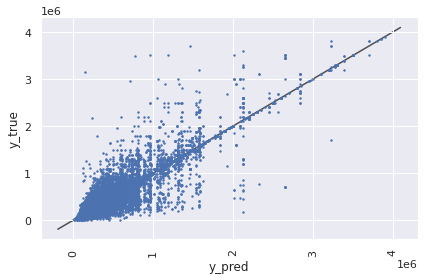

In [ ]:
grafica(y_train,y_train_pred)

In [ ]:
X_train.shape

(83118, 5)

In [ ]:
X_test.shape

(35622, 5)

Mean_squared_eror:  22415461485.430367
Mean_absolute_eror:  67472.88681624639
R_2 score:  0.6645419616683614


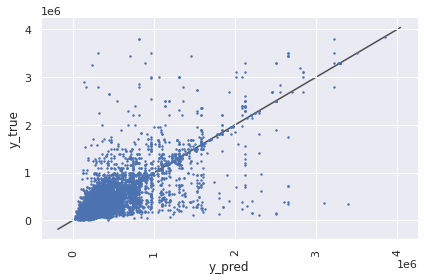

In [ ]:
grafica(y_test,y_test_pred)

Para este grafico vemos que como para las y_pred los valores no superan los 400 mil, que es el valor maximo de las y_test. Los anterior es algo que no pasaba en el modelo de regresion que para las y_pred si superaban el valor de 400 mil que es maximo valor para los valores de y_true es decir las y verdaderas.

Acontinuacion haremos lo anterior pero con k-vecinos y luego de ello eligiremos que modelo tiene una prediccion.

# Regresion K vecinos

 Iniciamente buscaremos el numero de vecinos optimo para nustro modelo de regresion de vecinos mas cercanos.

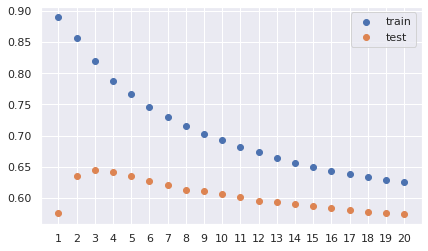

In [ ]:
max_kneighbors = range(1,21)
r2_train_k=[]
r2_test_k=[]

for k in max_kneighbors:
    k_reg = KNeighborsRegressor(n_neighbors=k)
    k_reg.fit(X_train, y_train) 
    
    y_train_pred = k_reg.predict(X_train)
    r2_train_k.append(r2_score(y_train, y_train_pred)) 
    
    y_test_pred = k_reg.predict(X_test)    
    r2_test_k.append(r2_score(y_test, y_test_pred))
    

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(121)

ax.scatter(max_kneighbors,r2_train_k,marker="o",label="train")
ax.scatter(max_kneighbors,r2_test_k,marker="o",label="test")

ax.set_xticks(max_kneighbors)


ax.legend()
plt.show()


Luego de ver dicha grafica obtenemos que para el par alos datso de netrenamiento los tiende a la baja cuando se va aumentando el numero de vecinos y para los datos de test va aumentando pero despues de cierto numeroo disminuye como con los datos de train.

De igual manera buscaremos el numero de vecinos con el cual se obtuvo un mejor score para los datos de test.

In [ ]:
r2_test_k= np.array(r2_test_k)

In [ ]:
df_score=pd.DataFrame({'Vecinos':max_kneighbors, 'r2_score':r2_test_k})
df_score

,Vecinos,r2_score
0,1,0.576242
1,2,0.634733
2,3,0.644693
3,4,0.642029
4,5,0.635576
5,6,0.627283
6,7,0.620704
7,8,0.613698
8,9,0.610768
9,10,0.606434


In [ ]:
len(df_score)

20

In [ ]:
r2_test_k.max()

0.644692549304291

In [ ]:
r2_test_k.argmax()

2

In [ ]:
df_score.loc[2]

Vecinos     3.000000
r2_score    0.644693
Name: 2, dtype: float64

Obtuvimos que el mejor puntaje obtenido para el modelo de K-Vecinos es:        0.5463530420862885. El cual se obtuve en el numero de vecinos = 11.

In [ ]:
k_reg = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
k_reg.fit(X_train, y_train) 
y_train_pred = k_reg.predict(X_train)
y_test_pred = k_reg.predict(X_test)

In [ ]:
print('R2_score Train: ', r2_score(y_train,y_train_pred))
print('R2_score Test: ', r2_score(y_test,y_test_pred))

R2_score Train:  0.8197560120583993
R2_score Test:  0.644692549304291


Graficaremos la regresion:

Mean_squared_eror:  23741808412.658794
Mean_absolute_eror:  68278.22434637771
R_2 score:  0.644692549304291


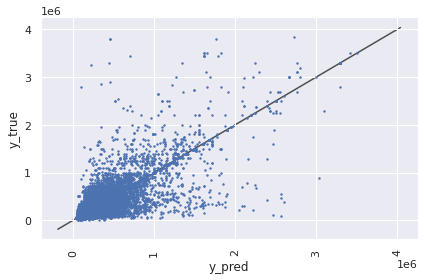

In [ ]:
grafica(y_test,y_test_pred)

# Conclusiones metricas

Luego de ejecuar los diferentes modelos y encontrar algunos hiperparametros que nos pueden ayudar a mejorar las metricas. Relacionaremos sus mejores matricas.

*   Regresion Lineal (Benchmark)    
  - R_2 score Train:  0.5008701969664888
  - R_2 score Test:  0.4805877099612743

*   Arbol de Regresion:
  - R_2 Train:  0.8328825713162147
  - R_2 score:  0.6645419616683614

*   K-Vecinos:
  - R_2 score Train: 0.644693
  - R_2 score Test:  0.6009170612447041

Al analizar estos resultados vemos que nuestros dos modelos siguientes al benchmark obtuvieron unos mejores puntajes.

# **Por ellos escogeremos el ARBOL DE REGRESION como nuestro mejor modelo.**



---






---

